In [ ]:
# import talib

# talib.get_function_groups()['Overlap Studies']

# ?talib.MAVP

# dir(talib)

# print(talib.get_functions())
# print(len(talib.get_functions()))


# list(talib.get_function_groups().keys())

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)



In [1]:
import talib
from talib import abstract
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('C:\\Users\DELL\Desktop\CryptoData\SOL110820_170522_1h.csv', index_col=0)
print(df.shape) #total rows available
# df = df.iloc[-10000:,:]
print(df.shape) #rows we are using
# print(df)

df.rename(columns={'Open':'open', 'High':'high','Low':'low','Close':'close','Volume':'volume'},inplace=True)

f = abstract

(16076, 12)
(16076, 12)


In [2]:
df

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1597125600000,2.8500,3.4700,2.8500,2.9515,20032.26,1597129199999,6.140623e+04,267,8525.75,2.642837e+04,0
1,1597129200000,2.9515,3.1355,2.8800,2.9224,42069.37,1597132799999,1.251929e+05,472,15341.03,4.557193e+04,0
2,1597132800000,2.9626,3.0000,2.9144,2.9600,24280.76,1597136399999,7.147019e+04,209,11965.57,3.518372e+04,0
3,1597136400000,2.9600,2.9736,2.8500,2.8543,26371.23,1597139999999,7.726005e+04,230,6206.30,1.822487e+04,0
4,1597140000000,2.8566,2.9329,2.8433,2.8976,26685.94,1597143599999,7.677592e+04,277,5229.47,1.508981e+04,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16071,1652731200000,54.0100,54.9900,53.7800,54.9500,155256.35,1652734799999,8.428790e+06,16416,88111.60,4.783726e+06,0
16072,1652734800000,54.9500,55.8000,54.6300,54.9900,197637.35,1652738399999,1.090025e+07,19240,104194.59,5.746908e+06,0
16073,1652738400000,54.9800,55.5500,54.1200,54.3500,248625.07,1652741999999,1.367046e+07,25691,119973.58,6.597384e+06,0
16074,1652742000000,54.3400,54.6400,53.2000,53.7900,185720.92,1652745599999,1.002349e+07,20462,86850.70,4.689697e+06,0


In [3]:

#candlestick patterns -+200:Bullish with confirm ; +100:Bullish ; 0:None ; -100:Sell ; -200:Bearish with confirm
dir_candle = [candle for candle in dir(f) if candle.startswith('CDL')]

#cycle indicators
dir_cycle = list(talib.get_function_groups()['Cycle Indicators'])

#math operators
dir_moperators = list(talib.get_function_groups()['Math Operators'])

#math transform
dir_mtransform = list(talib.get_function_groups()['Math Transform'])

#momentum indicators
dir_momentum = list(talib.get_function_groups()['Momentum Indicators'])

#overlap studies
dir_overlap = list(talib.get_function_groups()['Overlap Studies'])
dir_overlap.remove('MAVP') #no use known as manual parameter 'periods' required

#price transform
dir_ptransform = list(talib.get_function_groups()['Price Transform'])

#statistic functions
dir_statistics = list(talib.get_function_groups()['Statistic Functions'])


#volatility indicators
dir_volatility = list(talib.get_function_groups()['Volatility Indicators'])

#volume indicators
dir_volume = list(talib.get_function_groups()['Volume Indicators'])


#everything
all_dir = list(talib.get_functions())

# whichever to be added to dataframe
my_indi = dir_cycle + dir_moperators + dir_mtransform + dir_momentum + dir_overlap + dir_ptransform \
+ dir_statistics + dir_volatility + dir_volume # dir_candle +

#adding all patterns and indicators to the dataframe
for indicator in my_indi:
    x =str(indicator)
    y = getattr(f,x)(df)

    if type(y) == Series:
        df[indicator] = y.tolist()
    
    elif type(y) == DataFrame:
        for in_indi in y:
            df[in_indi] = y[in_indi]

# df

C:\Users\DELL\AppData\Local\Temp/ipykernel_11080/999450675.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[indicator] = y.tolist()


In [4]:
for i in range(1,73):
    df['last_open' +str(i)] = df['open'].shift(i)
    df['last_high' +str(i)] = df['high'].shift(i)
    df['last_low' +str(i)] = df['low'].shift(i)
    df['last_close' +str(i)] = df['close'].shift(i)
    df['last_volume' +str(i)] = df['volume'].shift(i)

C:\Users\DELL\AppData\Local\Temp/ipykernel_11080/3942778318.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['last_open' +str(i)] = df['open'].shift(i)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11080/3942778318.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['last_high' +str(i)] = df['high'].shift(i)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11080/3942778318.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [ ]:
df

In [ ]:
# copy of dataframe with everything
# df_full = df.copy()
# df_full.shape
# df_full

In [5]:
#creating target column with percentage change in close
df['close_delta'] = df['close'].pct_change().shift(periods=-1)

#dropping opentime and closetime as of no use for now
df = df.drop(['open_time', 'close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore'], axis=1)

# dropping columns with all values as NaN
df.dropna(axis=1, how='all', inplace=True)


#dropping rows with any values as NaN
df.dropna(inplace=True)

print(df.shape)
df

C:\Users\DELL\AppData\Local\Temp/ipykernel_11080/4259246652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['close_delta'] = df['close'].pct_change().shift(periods=-1)


(15987, 469)


,open,high,low,close,volume,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,...,last_high71,last_low71,last_close71,last_volume71,last_open72,last_high72,last_low72,last_close72,last_volume72,close_delta
88,3.3814,3.3927,3.3210,3.3792,62862.34,27.921287,15.525414,-0.095190,-0.143600,0.267666,...,3.3191,3.2000,3.2985,43097.80,3.2128,3.2500,3.08,3.2061,34992.96,0.013554
89,3.3792,3.4251,3.3598,3.4250,25809.71,27.714458,5.396654,-0.105211,-0.083416,0.094050,...,3.2985,3.0900,3.1127,64788.66,3.2037,3.3191,3.20,3.2985,43097.80,0.008117
90,3.4137,3.4693,3.4136,3.4528,30385.42,26.981408,-2.543516,-0.103539,-0.126861,-0.044378,...,3.2985,3.0900,3.1127,64788.66,3.2985,3.2985,3.09,3.1127,64788.66,-0.024647
91,3.4660,3.4897,3.3500,3.3677,49033.50,25.935025,-16.628016,-0.173062,-0.152132,-0.286157,...,3.3200,3.0800,3.2320,69220.85,3.2985,3.2985,3.09,3.1127,64788.66,0.012531
92,3.3676,3.4193,3.3321,3.4099,37198.22,24.715354,-17.665586,-0.214119,0.038905,-0.303461,...,3.2575,3.1317,3.1317,36985.70,3.1064,3.3200,3.08,3.2320,69220.85,-0.039385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16070,54.8600,55.4400,53.8000,54.0000,199370.95,24.349962,22.921119,-1.856644,-0.758739,0.389463,...,50.3600,48.2400,48.9200,258241.85,51.1300,51.6700,50.03,50.1300,147541.47,0.017593
16071,54.0100,54.9900,53.7800,54.9500,155256.35,24.452736,33.562725,-1.151814,2.637688,0.552850,...,51.2100,48.5600,51.1800,184827.90,50.1300,50.3600,48.24,48.9200,258241.85,0.000728
16072,54.9500,55.8000,54.6300,54.9900,197637.35,24.605308,38.705620,-0.351639,3.197443,0.625319,...,51.2100,48.5600,51.1800,184827.90,48.9300,51.2100,48.56,51.1800,184827.90,-0.011638
16073,54.9800,55.5500,54.1200,54.3500,248625.07,25.141308,47.816090,0.859304,4.302812,0.740993,...,51.7800,50.2200,51.1300,212641.02,48.9300,51.2100,48.56,51.1800,184827.90,-0.010304


In [ ]:
# # just for checking
# df_half = df.copy()
# df_half

# col1 = list(df_full.columns)

# #for checking which columns contain only NaN values
# for aam in col1:
#     if aam not in df_half.columns:
#         print(aam)
#         print(df_full.columns.get_loc(aam))

In [ ]:
df

In [6]:
df['Direction'] = [1 if i > 0 else 0 for i in df['close_delta']]
df = df.drop(['close_delta'], axis=1)
df

,open,high,low,close,volume,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,...,last_high71,last_low71,last_close71,last_volume71,last_open72,last_high72,last_low72,last_close72,last_volume72,Direction
88,3.3814,3.3927,3.3210,3.3792,62862.34,27.921287,15.525414,-0.095190,-0.143600,0.267666,...,3.3191,3.2000,3.2985,43097.80,3.2128,3.2500,3.08,3.2061,34992.96,1
89,3.3792,3.4251,3.3598,3.4250,25809.71,27.714458,5.396654,-0.105211,-0.083416,0.094050,...,3.2985,3.0900,3.1127,64788.66,3.2037,3.3191,3.20,3.2985,43097.80,1
90,3.4137,3.4693,3.4136,3.4528,30385.42,26.981408,-2.543516,-0.103539,-0.126861,-0.044378,...,3.2985,3.0900,3.1127,64788.66,3.2985,3.2985,3.09,3.1127,64788.66,0
91,3.4660,3.4897,3.3500,3.3677,49033.50,25.935025,-16.628016,-0.173062,-0.152132,-0.286157,...,3.3200,3.0800,3.2320,69220.85,3.2985,3.2985,3.09,3.1127,64788.66,1
92,3.3676,3.4193,3.3321,3.4099,37198.22,24.715354,-17.665586,-0.214119,0.038905,-0.303461,...,3.2575,3.1317,3.1317,36985.70,3.1064,3.3200,3.08,3.2320,69220.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16070,54.8600,55.4400,53.8000,54.0000,199370.95,24.349962,22.921119,-1.856644,-0.758739,0.389463,...,50.3600,48.2400,48.9200,258241.85,51.1300,51.6700,50.03,50.1300,147541.47,1
16071,54.0100,54.9900,53.7800,54.9500,155256.35,24.452736,33.562725,-1.151814,2.637688,0.552850,...,51.2100,48.5600,51.1800,184827.90,50.1300,50.3600,48.24,48.9200,258241.85,1
16072,54.9500,55.8000,54.6300,54.9900,197637.35,24.605308,38.705620,-0.351639,3.197443,0.625319,...,51.2100,48.5600,51.1800,184827.90,48.9300,51.2100,48.56,51.1800,184827.90,0
16073,54.9800,55.5500,54.1200,54.3500,248625.07,25.141308,47.816090,0.859304,4.302812,0.740993,...,51.7800,50.2200,51.1300,212641.02,48.9300,51.2100,48.56,51.1800,184827.90,0


In [7]:
import numpy as np   
from sklearn.linear_model import LinearRegression  

from sklearn.model_selection import train_test_split

In [8]:
# lets build our linear model
# independant variables
X = df.drop([ 'Direction'], axis=1)

# the dependent variable
Y = df[['Direction']]

In [ ]:
from sklearn.preprocessing import FunctionTransformer   
log_transformer = FunctionTransformer(np.log1p)
log_transformer

df = log_transformer.fit_transform(X)
X.head()

In [9]:
X.head()

,open,high,low,close,volume,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,...,last_open71,last_high71,last_low71,last_close71,last_volume71,last_open72,last_high72,last_low72,last_close72,last_volume72
88,3.3814,3.3927,3.3210,3.3792,62862.34,27.921287,15.525414,-0.095190,-0.143600,0.267666,...,3.2037,3.3191,3.2000,3.2985,43097.80,3.2128,3.2500,3.08,3.2061,34992.96
89,3.3792,3.4251,3.3598,3.4250,25809.71,27.714458,5.396654,-0.105211,-0.083416,0.094050,...,3.2985,3.2985,3.0900,3.1127,64788.66,3.2037,3.3191,3.20,3.2985,43097.80
90,3.4137,3.4693,3.4136,3.4528,30385.42,26.981408,-2.543516,-0.103539,-0.126861,-0.044378,...,3.2985,3.2985,3.0900,3.1127,64788.66,3.2985,3.2985,3.09,3.1127,64788.66
91,3.4660,3.4897,3.3500,3.3677,49033.50,25.935025,-16.628016,-0.173062,-0.152132,-0.286157,...,3.1064,3.3200,3.0800,3.2320,69220.85,3.2985,3.2985,3.09,3.1127,64788.66
92,3.3676,3.4193,3.3321,3.4099,37198.22,24.715354,-17.665586,-0.214119,0.038905,-0.303461,...,3.2311,3.2575,3.1317,3.1317,36985.70,3.1064,3.3200,3.08,3.2320,69220.85


In [10]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, shuffle=True)

In [11]:
from sklearn.decomposition import PCA

In [12]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

# XScaled = X.copy()
# XScaled.head()


,open,high,low,close,volume,HT_DCPERIOD,HT_DCPHASE,inphase,quadrature,sine,...,last_open71,last_high71,last_low71,last_close71,last_volume71,last_open72,last_high72,last_low72,last_close72,last_volume72
88,-0.935030,-0.936449,-0.934298,-0.935125,-0.502266,1.162978,-1.024671,-0.051805,-0.041260,0.440490,...,-0.932766,-0.932649,-0.931253,-0.931465,-0.593425,-0.932568,-0.933567,-0.932933,-0.932728,-0.631913
89,-0.935061,-0.935986,-0.933732,-0.934464,-0.678652,1.122298,-1.124663,-0.056528,-0.023546,0.151693,...,-0.931400,-0.932944,-0.932854,-0.934143,-0.490201,-0.932699,-0.932580,-0.931187,-0.931396,-0.593343
90,-0.934563,-0.935353,-0.932947,-0.934062,-0.656870,0.978119,-1.203050,-0.055740,-0.036333,-0.078573,...,-0.931400,-0.932944,-0.932854,-0.934143,-0.490201,-0.931333,-0.932874,-0.932788,-0.934074,-0.490118
91,-0.933808,-0.935062,-0.933875,-0.935291,-0.568097,0.772312,-1.342094,-0.088513,-0.043771,-0.480755,...,-0.934168,-0.932637,-0.933000,-0.932423,-0.469109,-0.931333,-0.932874,-0.932788,-0.934074,-0.490118
92,-0.935229,-0.936069,-0.934136,-0.934682,-0.624438,0.532423,-1.352337,-0.107866,0.012455,-0.509539,...,-0.932371,-0.933529,-0.932247,-0.933869,-0.622512,-0.934102,-0.932567,-0.932933,-0.932355,-0.469026


In [13]:
XScaled.dropna(axis=1,how='all',inplace=True)
XScaled.shape

(15987, 468)

In [14]:
print(np.any(np.isnan(XScaled)))
print(np.all(np.isfinite(XScaled)))


False
True


In [15]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00006255  0.99995992  0.99994919 ...  0.98957602  0.98975912
  -0.03369985]
 [ 0.99995992  1.00006255  0.99987874 ...  0.98939935  0.98959487
  -0.03246544]
 [ 0.99994919  0.99987874  1.00006255 ...  0.98952896  0.98969322
  -0.03536266]
 ...
 [ 0.98957602  0.98939935  0.98952896 ...  1.00006255  0.99994134
  -0.04791013]
 [ 0.98975912  0.98959487  0.98969322 ...  0.99994134  1.00006255
  -0.04140265]
 [-0.03369985 -0.03246544 -0.03536266 ... -0.04791013 -0.04140265
   1.00006255]]


In [16]:
pca = PCA(n_components=468)
pca.fit(XScaled)

PCA(n_components=468)

In [36]:
print(pca.explained_variance_)
print(max(pca.explained_variance_))
print(np.argmax(pca.explained_variance_))


[3.35196137e+02 3.25675867e+01 1.63392962e+01 7.11107933e+00
 5.27244648e+00 3.64573348e+00 3.39396444e+00 3.00083369e+00
 2.87778360e+00 2.36916868e+00 2.16874723e+00 2.11536228e+00
 1.99159386e+00 1.81306683e+00 1.67385592e+00 1.52716263e+00
 1.48941050e+00 1.41931047e+00 1.39147289e+00 1.36372398e+00
 1.31217108e+00 1.24758641e+00 1.18217605e+00 1.06523107e+00
 1.01483138e+00 9.98206057e-01 9.39962145e-01 9.28860989e-01
 9.19267182e-01 9.09126161e-01 8.69209850e-01 8.65262936e-01
 8.49540141e-01 8.09579523e-01 7.95371908e-01 7.25235476e-01
 7.02459794e-01 6.89070343e-01 6.78942074e-01 6.53380888e-01
 6.22610321e-01 5.91004750e-01 5.50584167e-01 5.41625965e-01
 5.25971418e-01 5.19556095e-01 4.98278723e-01 4.92114503e-01
 4.71776276e-01 4.50347841e-01 4.33722921e-01 4.12471516e-01
 3.94072381e-01 3.86620121e-01 3.70923396e-01 3.70013196e-01
 3.61560508e-01 3.48837354e-01 3.28007563e-01 3.18720906e-01
 3.13405234e-01 3.12777326e-01 3.01661951e-01 2.90722860e-01
 2.87233022e-01 2.822593

In [40]:
print(pca.components_)



[[ 5.44566090e-02  5.44527154e-02  5.44475776e-02 ...  5.44073674e-02
   5.44157037e-02 -2.03447384e-03]
 [ 2.51585569e-03  3.16922852e-03  1.91016164e-03 ... -3.03582734e-03
  -2.41821414e-03  9.64806909e-02]
 [ 1.07902073e-02  1.13229649e-02  1.15990086e-02 ... -2.10074301e-03
  -2.21933913e-03 -2.68812804e-02]
 ...
 [ 0.00000000e+00  2.48128721e-01  1.30952804e-02 ... -1.19348975e-15
  -6.24500451e-17  8.32667268e-17]
 [ 0.00000000e+00 -2.31824253e-01  8.97596726e-02 ...  1.76941795e-16
  -1.16226473e-15  1.04083409e-17]
 [-2.35083159e-01 -9.19009710e-02 -9.36606504e-02 ... -1.06858966e-15
   4.99166680e-16 -1.90819582e-17]]


In [37]:
print(pca.explained_variance_ratio_)
print(max(pca.explained_variance_ratio_))
print(np.argmax(pca.explained_variance_ratio_))


[7.16186261e-01 6.95845076e-02 3.49108421e-02 1.51936635e-02
 1.12652066e-02 7.78954153e-03 7.25160714e-03 6.41163672e-03
 6.14872562e-03 5.06200959e-03 4.63378541e-03 4.51972213e-03
 4.25527625e-03 3.87383209e-03 3.57639149e-03 3.26296389e-03
 3.18230201e-03 3.03252497e-03 2.97304668e-03 2.91375786e-03
 2.80360897e-03 2.66561618e-03 2.52585919e-03 2.27599239e-03
 2.16830749e-03 2.13278551e-03 2.00834049e-03 1.98462156e-03
 1.96412325e-03 1.94245576e-03 1.85716983e-03 1.84873678e-03
 1.81514317e-03 1.72976257e-03 1.69940632e-03 1.54955152e-03
 1.50088858e-03 1.47228043e-03 1.45064018e-03 1.39602568e-03
 1.33028072e-03 1.26275167e-03 1.17638831e-03 1.15724805e-03
 1.12380025e-03 1.11009316e-03 1.06463153e-03 1.05146094e-03
 1.00800591e-03 9.62221521e-04 9.26700408e-04 8.81294264e-04
 8.41982331e-04 8.26059695e-04 7.92521784e-04 7.90577032e-04
 7.72516862e-04 7.45332337e-04 7.00827020e-04 6.80984977e-04
 6.69627415e-04 6.68285815e-04 6.44536499e-04 6.21163837e-04
 6.13707383e-04 6.030805

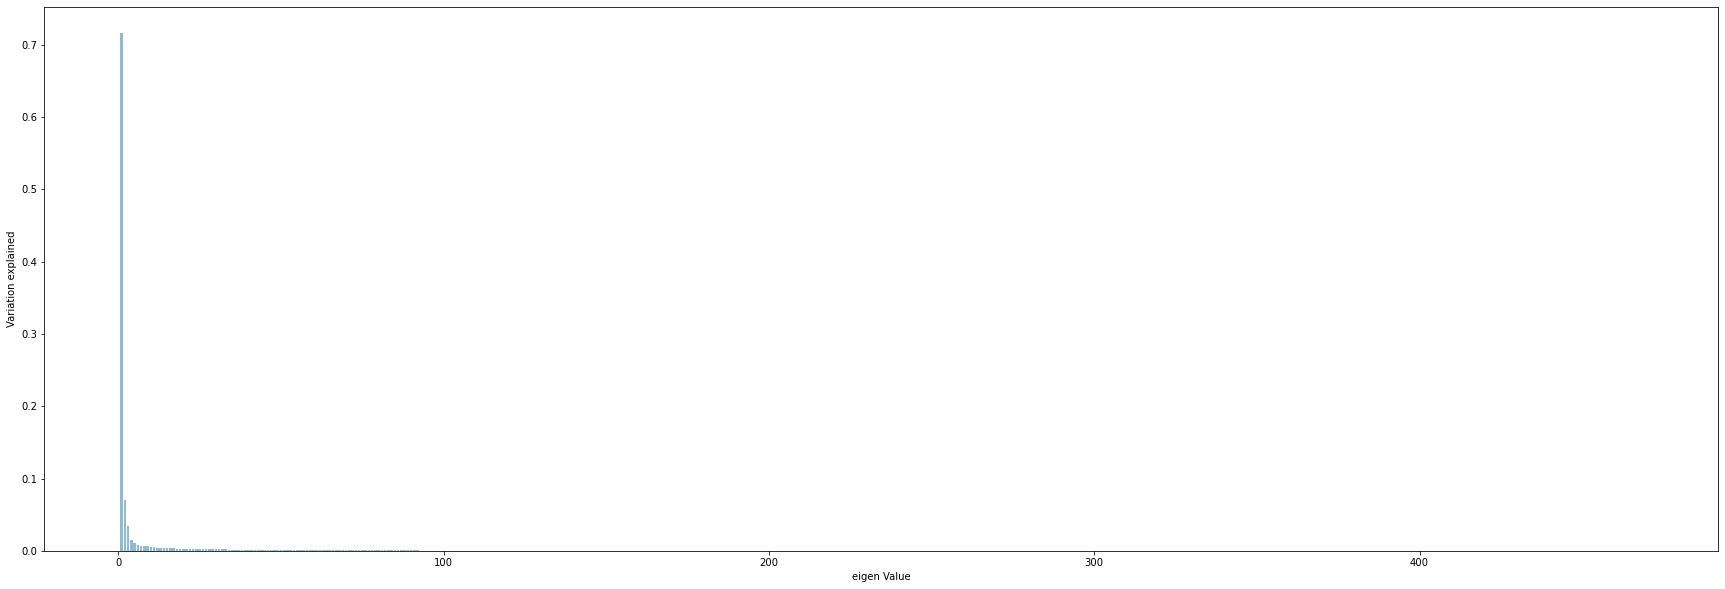

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline 

from matplotlib.pyplot import figure
figure(figsize=(30, 10)) #, dpi=80)

plt.bar(list(range(1,469)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

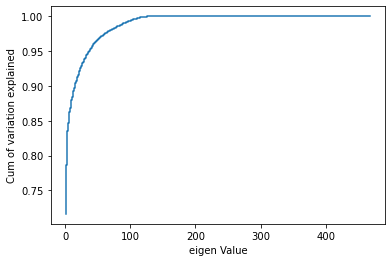

In [29]:
plt.step(list(range(1,469)),, where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [51]:
for i in range(1,469):
    print(f'eigen value-{i} = {np.sum(pca.explained_variance_ratio_[0:i+1])*100} \
    {np.sum(pca.explained_variance_ratio_[0:i+1])*100 - np.sum(pca.explained_variance_ratio_[0:i])*100} \n')
   

eigen value-1 = 78.57707682433022     6.958450760457765 

eigen value-2 = 82.0681610371437     3.491084212813476 

eigen value-3 = 83.58752738871156     1.519366351567868 

eigen value-4 = 84.714048046914     1.1265206582024376 

eigen value-5 = 85.4930021997071     0.778954152793105 

eigen value-6 = 86.21816291339726     0.7251607136901583 

eigen value-7 = 86.85932658555534     0.641163672158072 

eigen value-8 = 87.47419914734762     0.6148725617922821 

eigen value-9 = 87.98040010599111     0.5062009586434897 

eigen value-10 = 88.443778646549     0.4633785405578976 

eigen value-11 = 88.8957508598279     0.4519722132788928 

eigen value-12 = 89.32127848491739     0.4255276250894866 

eigen value-13 = 89.7086616935461     0.38738320862871944 

eigen value-14 = 90.06630084222618     0.35763914868007873 

eigen value-15 = 90.39259723155362     0.3262963893274389 

eigen value-16 = 90.71082743222377     0.3182302006701434 

eigen value-17 = 91.01407992959906     0.303252497375297 

e

In [30]:
pca30 = PCA(n_components=468)
pca30.fit(XScaled)
print(pca30.components_)
print(pca30.explained_variance_ratio_)
Xpca30 = pca30.transform(XScaled)

[[ 5.44566090e-02  5.44527154e-02  5.44475776e-02 ...  5.44073674e-02
   5.44157037e-02 -2.03447384e-03]
 [ 2.51585569e-03  3.16922852e-03  1.91016164e-03 ... -3.03582734e-03
  -2.41821414e-03  9.64806909e-02]
 [ 1.07902073e-02  1.13229649e-02  1.15990086e-02 ... -2.10074301e-03
  -2.21933913e-03 -2.68812804e-02]
 ...
 [ 0.00000000e+00  2.48128721e-01  1.30952804e-02 ... -1.19348975e-15
  -6.24500451e-17  8.32667268e-17]
 [ 0.00000000e+00 -2.31824253e-01  8.97596726e-02 ...  1.76941795e-16
  -1.16226473e-15  1.04083409e-17]
 [-2.35083159e-01 -9.19009710e-02 -9.36606504e-02 ... -1.06858966e-15
   4.99166680e-16 -1.90819582e-17]]
[7.16186261e-01 6.95845076e-02 3.49108421e-02 1.51936635e-02
 1.12652066e-02 7.78954153e-03 7.25160714e-03 6.41163672e-03
 6.14872562e-03 5.06200959e-03 4.63378541e-03 4.51972213e-03
 4.25527625e-03 3.87383209e-03 3.57639149e-03 3.26296389e-03
 3.18230201e-03 3.03252497e-03 2.97304668e-03 2.91375786e-03
 2.80360897e-03 2.66561618e-03 2.52585919e-03 2.27599239e-0

In [ ]:
Xpca30

In [ ]:
# import seaborn as sns
# sns.pairplot(pd.DataFrame(Xpca30))

In [31]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca30, Y)
regression_model_pca.score(Xpca30, Y)

0.035522403099539024

In [32]:
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train2 = poly.fit_transform(pd.DataFrame(Xpca30).iloc[0:7000,:])
X_test2 = poly.fit_transform(pd.DataFrame(Xpca30).iloc[7000:,:])

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y.iloc[0:7000,:])

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y.iloc[0:7000,:]))

#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y.iloc[7000:,:]))

# but this improves as the cost of  extra variables!
print(X_train2.shape)

MemoryError: Unable to allocate 7.38 GiB for an array with shape (8987, 110215) and data type float64

In [ ]:
from scipy.stats import zscore
X=X.apply(zscore)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

# but this improves as the cost of  extra variables!
print(X_train2.shape)